# SALES PREDICTION USING PYTHON

#### submitted by TELS MARIYA THOMAS as part of Intership at CodSoft 

https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

SALES PREDICTION USING PYTHON

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection. In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let' s embark on the journey of sales prediction using machine learning in Python.

In [2]:
# import the librarires 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the data and visualization 

In [3]:
# load the data 
data=pd.read_csv(r"car_purchasing.csv", encoding='latin1')

In [4]:
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
# check the missing values
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

no misisng values

In [6]:
# check for duplicates 
data.duplicated().sum()

0

no duplicates

In [7]:
# drop unnecessory columns 
df=data.drop(['customer name','customer e-mail'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              500 non-null    object 
 1   gender               500 non-null    int64  
 2   age                  500 non-null    float64
 3   annual Salary        500 non-null    float64
 4   credit card debt     500 non-null    float64
 5   net worth            500 non-null    float64
 6   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [9]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


There are no misisng values in the data 
Age may be highly skewed. 

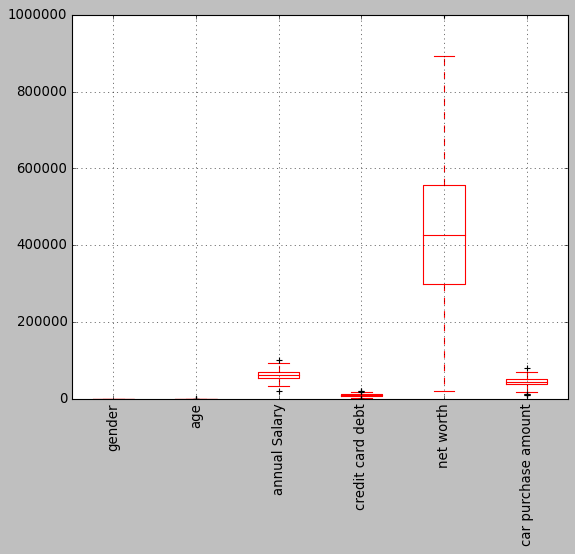

In [10]:
# checking for outliers 
plt.style.use('classic')
df.boxplot(color='red')
plt.xticks(rotation=90)
plt.show()

there are outliers in networth. 

In [10]:
q1=df['net worth'].quantile(0.25)
q3=df['net worth'].quantile(0.75)
iqr=q3-q1

In [11]:
# dropping the outlires 
ul=q3+(iqr*1.5)
ll=q1-(iqr*1.5)

df1=df[~((df['net worth']<ll) | (df['net worth']>ul))]
df1

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


#### Univariate analysis 

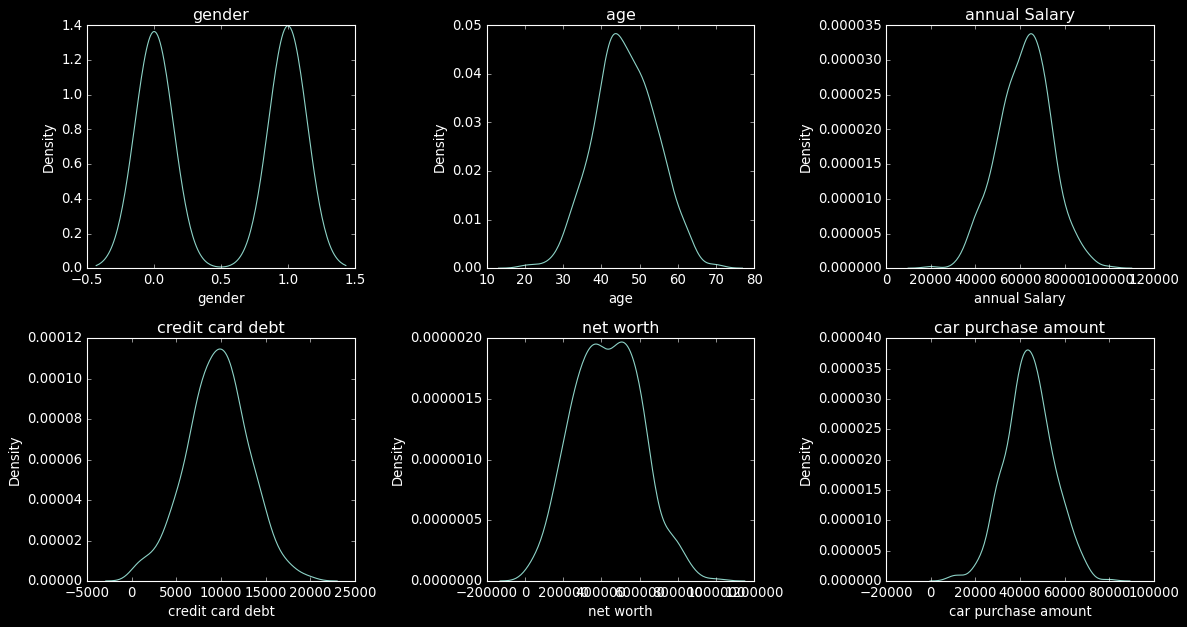

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
re=1
for i in df1.select_dtypes(exclude=object).columns:
    plt.subplot(2,3,re)
    sns.kdeplot(x=df[i])
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

#### Bivariate analysis

In [14]:
df1.columns

Index(['country', 'gender', 'age', 'annual Salary', 'credit card debt',
       'net worth', 'car purchase amount'],
      dtype='object')

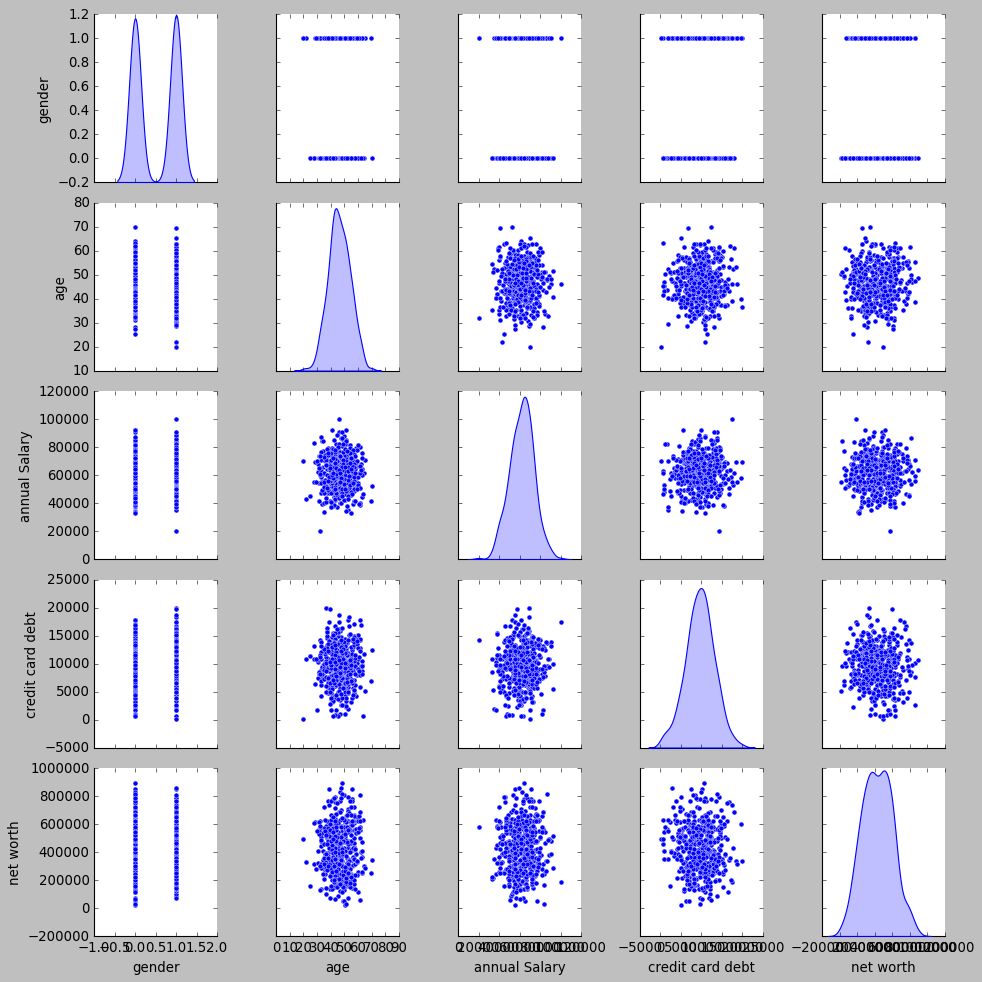

In [17]:
plt.style.use('classic')
sns.pairplot(df1[['country', 'gender', 'age', 'annual Salary', 'credit card debt',
       'net worth']],diag_kind='kde')
plt.show()

### numerical column vs car purcahse price

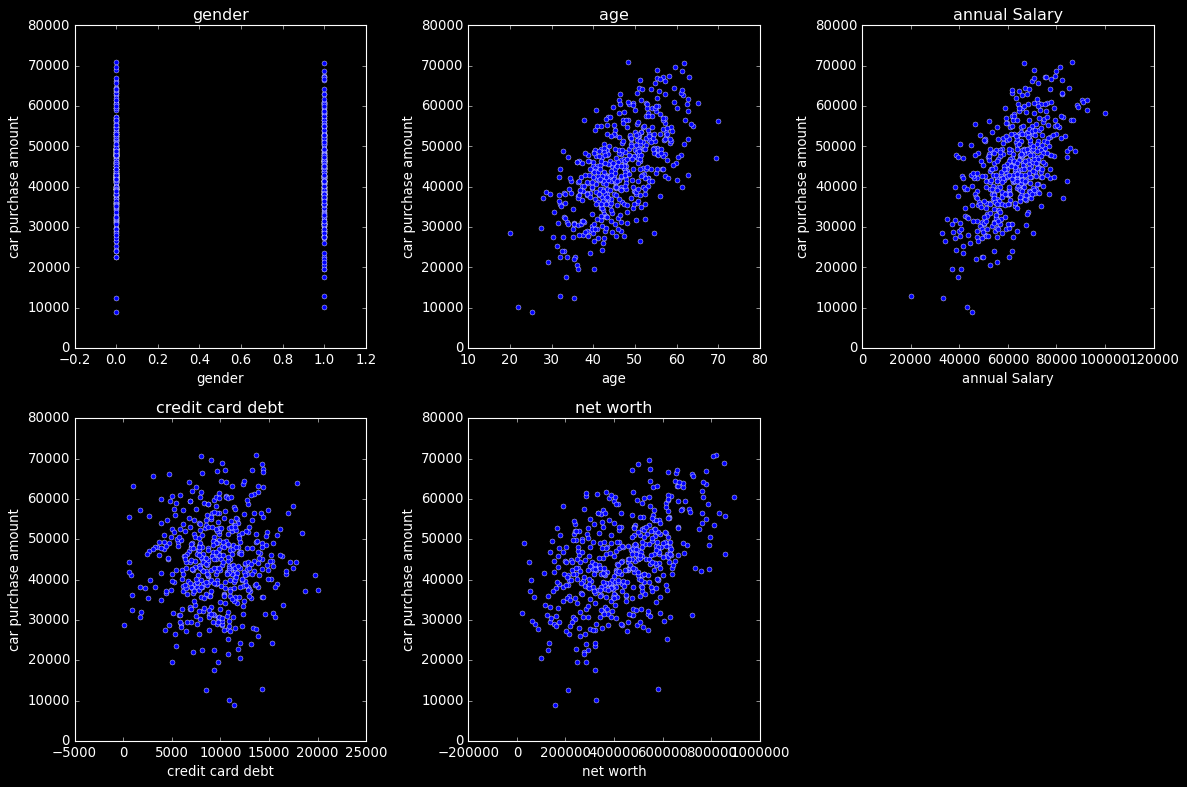

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
re=1
for i in ['gender', 'age', 'annual Salary', 'credit card debt','net worth']:
    plt.subplot(2,3,re)
    sns.scatterplot(data=df1,x=df[i],y='car purchase amount')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

car purachse price is lineraly related to age, networth and annual salary 

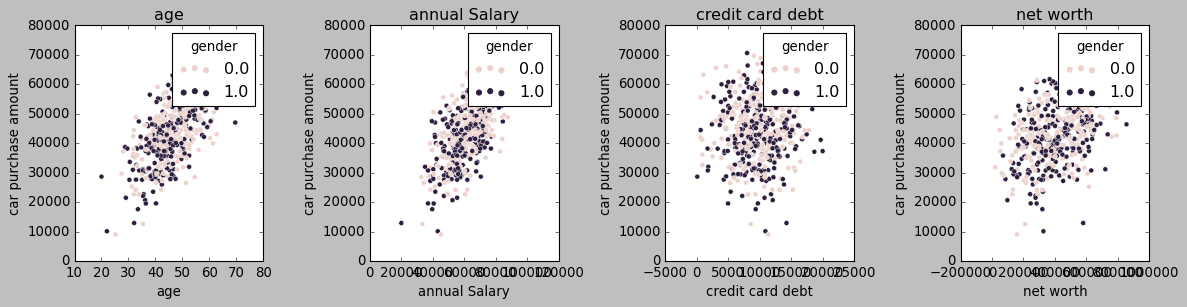

In [19]:
plt.style.use('classic')
plt.figure(figsize=(15,4))
re=1
for i in ['age', 'annual Salary', 'credit card debt','net worth']:
    plt.subplot(1,4,re)
    sns.scatterplot(data=df1,x=df[i],y='car purchase amount', hue='gender')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

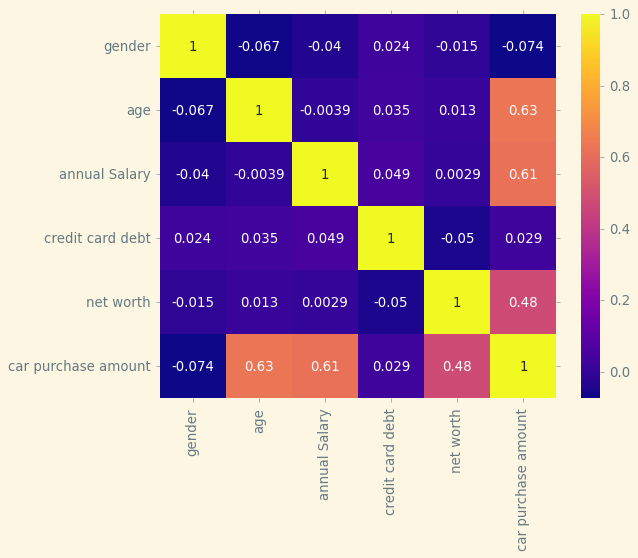

In [20]:
plt.style.use('Solarize_Light2')
sns.heatmap(df1.corr(), cmap='plasma', annot=True)
plt.show()

### conclusions from the plots 

*The gender has only 2 catgories.\
*Age count is high around 45. \
*Annual salary peaks around 600000. \
*Credut card debt peaks around 10000. \
*Net worth is multimodal.\
*Car purchase price peaks around 40000. 

*No appreciable linear relationship can be found from the pairplot. 

*Considering the ralationship between carpurchase price and other numerical variables it is evident that there exists a linear relationship between car purchase price to age, annual salary and networth.  Cosidering hue as gender, it doesnt create any clusters but the points are scattered among the whole data points. 

*From the heatmap the following variables have high correalation with the target:\
	1.age (0.63)\
	2.annual salary (0.61)	\
	3. net_worth (0.48)

# Feature Engineering 

In the data we have country which is highly unique. so using creating a new column called continent. 

In [12]:
df1['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

In [13]:
# create list of countries in each continent 
europe = [
    'Albania',
    'Germany',
    'France',
    'Italy',
    'Spain',
    'United Kingdom',
    'Greece',
    'Netherlands',
    'Belgium',
    'Switzerland',
    'Austria',
    'Portugal',
    'Denmark',
    'Sweden',
    'Norway',
    'Finland',
    'Ireland',
    'Poland',
    'Czech Republic',
    'Hungary',
    'Romania',
    'Bulgaria',
    'Croatia',
    'Serbia',
    'Slovakia',
    'Slovenia',
    'Macedonia',
    'Bosnia and Herzegovina',
    'Montenegro',
    'Kosovo',
    'Luxembourg',
    'Estonia',
    'Latvia',
    'Lithuania',
    'Iceland',
    'Malta',
    'Cyprus',
    'Åland Islands',
    'Jersey',
    'San Marino',
    'Andorra',
    'Liechtenstein',
    'Monaco',
    'Belarus',
    'Guernsey',
    'Isle of Man',
    'Moldova',
    'United Kingdom (Great Britain)'
]

northamerica= [
    'United States',
    'Canada',
    'Mexico',
    'Guatemala',
    'Honduras',
    'El Salvador',
    'Nicaragua',
    'Costa Rica',
    'Panama',
    'Belize',
    'Cuba',
    'Jamaica',
    'Haiti',
    'Dominican Republic',
    'Puerto Rico',
    'Bahamas',
    'Trinidad and Tobago',
    'Barbados',
    'Saint Kitts and Nevis',
    'Antigua and Barbuda',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Grenada',
    'Dominica','Sint Maarten',
    'Greenland',
    'Saint Pierre and Miquelon',
    'Turks and Caicos Islands',
    'Anguilla',
    'Jersey',
    'United States Minor Outlying Islands',
    'Aruba',
    'Martinique',
    'Guadeloupe',
    'Curaçao',
    'Virgin Islands, British',
    'Saint Martin',
    'Saint Barthélemy',
    'Bermuda',
    'Saint Vincent and The Grenadines',
    'Bonaire, Sint Eustatius and Saba',
    'Cayman Islands',
    'Virgin Islands',
    'United States',
    'Virgin Islands, United States'
    
]

asia= [
    'China',
    'India',
    'Japan',
    'South Korea',
    'Indonesia',
    'Pakistan',
    'Bangladesh',
    'Russia',
    'Turkey',
    'Iran',
    'Saudi Arabia',
    'Iraq',
    'Israel',
    'Jordan',
    'Lebanon',
    'United Arab Emirates',
    'Qatar',
    'Oman',
    'Yemen',
    'Afghanistan',
    'Kazakhstan',
    'Uzbekistan',
    'Kyrgyzstan',
    'Tajikistan',
    'Turkmenistan',
    'Vietnam',
    'Thailand',
    'Malaysia',
    'Singapore',
    'Philippines',
    'Indonesia',
    'Sri Lanka',
    'Nepal',
    'Bhutan',
    'Maldives',
    'Mongolia',
    'Syria',
    'Armenia',
    'Palestine, State of',
    'Cambodia',
    'Georgia',
    'Timor-Leste',
    'Taiwan',
    'Myanmar',
    'Laos',
    'Vietnam',
    'Bahrain',
    'Hong Kong',
    'Macao',
    'Turkmenistan',
    'Azerbaijan',
    'Vietnam',
    'Christmas Island',
    'Kuwait',
    'Cocos (Keeling) Islands',
    'Faroe Islands',
    'Korea, South',
    'Ukraine',
    'Viet Nam'
]

southamerica= [
    'Argentina',
    'Brazil',
    'Colombia',
    'Peru',
    'Venezuela',
    'Chile',
    'Ecuador',
    'Bolivia',
    'Paraguay',
    'Uruguay',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana',
    'Suriname',
    'French Guiana',
    'Guyana']
africa = [
    'Nigeria',
    'South Africa',
    'Kenya',
    'Egypt',
    'Morocco',
    'Ghana',
    'Ivory Coast',
    'Algeria',
    'Angola',
    'Ethiopia',
    'Uganda',
    'Tanzania',
    'Cameroon',
    'Mozambique',
    'Zimbabwe',
    'Senegal',
    'Tunisia',
    'Sudan',
    'Morocco',
    'Burundi',
    'Rwanda',
    'Botswana',
    'Namibia',
    'Mali',
    'Malawi',
    'Sierra Leone',
    'Liberia',
    'Somalia',
    'Eswatini',
    'Lesotho',
    'Comoros',
    'Seychelles',
    'Mauritius',
    'Madagascar',
    'Djibouti',
    'Guinea',
    'Gambia',
    'Equatorial Guinea',
    'Cape Verde',
    'Chad',
    'Burkina Faso',
    'Benin',
    'Central African Republic',
    'Democratic Republic of the Congo',
    'Republic of the Congo',
    'Gabon',
    'Zambia',
    'Maldives',
     'Guinea-Bissau',
    'Reunion',
    'Mayotte',
    'Togo',
    'San Marino',
    'Andorra',
    'Falkland Islands',
    'Mauritania',
    'Congo (Brazzaville)',
    'Sao Tome and Principe',
    'French Southern Territories',
    'Saint Helena, Ascension and Tristan da Cunha',
    'Western Sahara',
    'Niger', 'South Sudan', 'marlal']

    
oceania=['Australia',
    'New Zealand',
    'Fiji',
    'Papua New Guinea',
    'Solomon Islands',
    'Vanuatu',
    'Samoa',
    'Tonga',
    'Kiribati',
    'Tuvalu',
    'Palau',
    'Marshall Islands',
    'Micronesia',
    'Nauru',
    'Cook Islands',
    'Niue',
    'Tokelau',
    'French Polynesia',
    'Wallis and Futuna',
    'New Caledonia',
    'Pitcairn Islands',
    'Norfolk Island',
    'Guam',
    'Northern Mariana Islands',
    'American Samoa',
    'Federated States of Micronesia',
    'Republic of the Marshall Islands',
    'Palau',
    'Tuvalu',
    'Kiribati',
    'Nauru',
    'Vanuatu',
    'Samoa',
    'Tonga',
    'Fiji',
    'Papua New Guinea',
    'Solomon Islands',
    'Australia',
    'New Zealand'
]

antarctica = [
    'Bouvet Island',
    'Heard Island and Mcdonald Islands',
    'French Southern Territories',
    'South Georgia and The South Sandwich Islands',
    'Antarctica'
]

In [14]:
# defining a function to classify the countries in different continents. 
def continents(i):
    if i in europe:
        return 'Europe'
    elif i in asia:
        return 'Asia'
    elif i in southamerica:
        return 'SouthAmerica'
    elif i in northamerica:
        return 'NorthAmerica'
    elif i in africa:
        return 'Africa'
    elif i in oceania:
        return 'Oceania'
    elif i in antarctica:
        return 'Antartica'

In [15]:
# Apply the function  to the column country 
df1['continent']=df1['country'].apply(continents)

In [16]:
# now we can drop the country columns 
df2=df1.drop('country', axis=1)

In [78]:
# new column with age income interaction
# df2['Age_Income_Interaction']=df2['age']*df2['annual Salary']

In [175]:
# new column defining wealth level 
# df2['Wealth Level']=df2['net worth'].apply(lambda x: 'low' if 20000<x<200000 else 'medium' if 200000<x<500000 else 'high')

In [104]:
# new column with age group 
# df2['age group']=df2['age'].apply(lambda x: 'young' if 20<x<35 else 'adult' if 35<x<60 else 'senior')

In [36]:
# new column called income to debt ratio 
# df2['debt to income Ratio']=df2['credit card debt']/df2['annual Salary']

In [105]:
# df4=df2.drop('age', axis=1)

In [17]:
# copy the data set 
df4=df2.copy()

In [18]:
df4

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Europe
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,NorthAmerica
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Africa
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Oceania
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,SouthAmerica
...,...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,Asia
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,Africa
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,Asia
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,Africa


# MODELLING -- regression models

In [19]:
# import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor

In [20]:
# get the dummies 
df3=pd.get_dummies(df4)

In [21]:
df3

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent_Africa,continent_Antartica,continent_Asia,continent_Europe,continent_NorthAmerica,continent_Oceania,continent_SouthAmerica
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,0,0,0,1,0,0,0
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,0,0,0,0,1,0,0
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,1,0,0,0,0,0,0
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,0,0,0,0,0,1,0
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,0,0,1,0,0,0,0
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,1,0,0,0,0,0,0
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,0,0,1,0,0,0,0
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,1,0,0,0,0,0,0


In [22]:
# get the independent variables 
features=df3.drop('car purchase amount', axis=1)
target=df3['car purchase amount']

# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=1)

In [23]:
# check the shape of the train and test 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((399, 12), (100, 12), (399,), (100,))

## BUILDING DIFFERENT MODELS 

# 1. LINEAR REGRESSION

In [123]:
lr=LinearRegression()

In [124]:
lr_model = lr.fit(X_train,y_train)
ypred_train_lr = lr_model.predict(X_train)
ypred_test_lr = lr_model.predict(X_test)

print("RMSE Train lr:",mean_squared_error(y_train,ypred_train_lr,squared=False))
print("RMSE Test lr:",mean_squared_error(y_test,ypred_test_lr,squared=False))
r2_train_lr=r2_score(y_train,ypred_train_lr)
r2_test_lr=r2_score(y_test,ypred_test_lr)

print("R2 Train :", r2_train_lr)
print("R2 Test:" ,r2_test_lr)

RMSE Train lr: 1.4178626459590793
RMSE Test lr: 1.5906374411023987
R2 Train : 0.999999982788254
R2 Test: 0.9999999740429658


In [125]:
# appending the scores to a dataframe called  D for the final analysis 
D=pd.DataFrame()
D['SCORE']=['rmse train', 'rmse test', 'r2 train','r2 test']
D['LINEAR REGRESSION']=[mean_squared_error(y_train,ypred_train_lr,squared=False),mean_squared_error(y_test,ypred_test_lr,squared=False),
                       r2_train_lr,r2_test_lr]

In [126]:
D

,SCORE,LINEAR REGRESSION
0,rmse train,1.417863
1,rmse test,1.590637
2,r2 train,1.000000
3,r2 test,1.000000


# 2.RIDGE

In [127]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 1e-10} 



In [128]:
# use Ridge() to perform ridge regression

ridge_model = Ridge(alpha = 1e-10, max_iter = 500)

# fit the model on train set
ridge_model.fit(X_train, y_train)

Ridge(alpha=1e-10, max_iter=500)

In [129]:
# get predicted values

ypred_train_ridge = ridge_model.predict(X_train)
ypred_test_ridge = ridge_model.predict(X_test)


In [130]:
print("RMSE Train lr_ridge:",mean_squared_error(y_train,ypred_train_ridge,squared=False))
print("RMSE Test lr_ridge:",mean_squared_error(y_test,ypred_test_ridge,squared=False))



r2_train_ridge=r2_score(y_train,ypred_train_ridge)
r2_test_ridge=r2_score(y_test,ypred_test_ridge)

print("R2 Train ridge2:", r2_train_ridge)
print("R2 Test ridge2:" ,r2_test_ridge)


RMSE Train lr_ridge: 1.4178626459595907
RMSE Test lr_ridge: 1.590637443029092
R2 Train ridge2: 0.999999982788254
R2 Test ridge2: 0.9999999740429657


In [131]:
D['ridge']=[mean_squared_error(y_train,ypred_train_ridge,squared=False),
                                   mean_squared_error(y_test,ypred_test_ridge,squared=False),
                        r2_train_ridge,r2_test_ridge]

# 3. LASSO

In [132]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the LASSO regression model
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Lasso Regression:  {'alpha': 0.1} 



In [133]:
lasso_model = Lasso(alpha = 0.1, max_iter = 500)

In [134]:
# fit the model 
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=500)

In [135]:
# get the predicted values
ypred_train_LASSO = lasso_model.predict(X_train)
ypred_test_LASSO = lasso_model.predict(X_test)

In [136]:
# get rmse and r2 score 
print("RMSE Train lasso:",mean_squared_error(y_train,ypred_train_LASSO ,squared=False))
print("RMSE Test lasso:",mean_squared_error(y_test,ypred_test_LASSO ,squared=False))
r2_train_lasso=r2_score(y_train,ypred_train_LASSO)
r2_test_lasso=r2_score(y_test,ypred_test_LASSO)
print("R2 Train :", r2_train_lasso)
print("R2 Test:" ,r2_test_lasso)

RMSE Train lasso: 1.4396053117115093
RMSE Test lasso: 1.617142133718986
R2 Train : 0.9999999822563285
R2 Test: 0.9999999731707179


In [137]:
D['lasso']=[mean_squared_error(y_train,ypred_train_LASSO ,squared=False),
                                   mean_squared_error(y_test,ypred_test_LASSO ,squared=False),
                        r2_train_lasso,r2_test_lasso]

# 4.  ELASTIC NET

In [138]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()


enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')



Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 



In [139]:
elasticnet_model = ElasticNet(alpha = 0.0001, l1_ratio=0.2, max_iter = 500)

In [140]:
# fit the model 
elasticnet_model .fit(X_train, y_train)

ElasticNet(alpha=0.0001, l1_ratio=0.2, max_iter=500)

In [141]:
# get the predicted values 
ypred_train_ENET = elasticnet_model.predict(X_train)
ypred_test_ENET = elasticnet_model.predict(X_test)

In [142]:
# get the scores
print("RMSE Train lr enet:",mean_squared_error(y_train,ypred_train_ENET ,squared=False))
print("RMSE Test lr enet:",mean_squared_error(y_test,ypred_test_ENET,squared=False))
r2_train_enet=r2_score(y_train,ypred_train_ENET)
r2_test_enet=r2_score(y_test,ypred_test_ENET)
print("R2 Train _enet:", r2_train_enet)
print("R2 Test enet:" ,r2_test_enet)

RMSE Train lr enet: 1.4178911506326788
RMSE Test lr enet: 1.5896825371594632
R2 Train _enet: 0.9999999827875619
R2 Test enet: 0.9999999740741219


In [143]:
D['enet']=[mean_squared_error(y_train,ypred_train_ENET ,squared=False),
                                   mean_squared_error(y_test,ypred_test_ENET,squared=False),
                       r2_train_enet,r2_test_enet]

# FEATURE SELECTION AND REBUILDING THE MODEL

## 5. forward feature selection

In [24]:
lr= LinearRegression()

lr_forward = sfs(estimator=lr, k_features ='best', forward=True,
                     verbose=2, scoring='r2')


sfs_forward = lr_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2023-11-26 10:39:28] Features: 1/12 -- score: 0.3978206687942568[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-11-26 10:39:28] Features: 2/12 -- score: 0.7783221942693743[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-11-26 10:39:28] Features: 3/12 -- score: 0.9999999813371995[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [25]:
sfs_forward.k_feature_names_

('age', 'annual Salary', 'net worth', 'continent_Asia', 'continent_Europe')

In [26]:
x=features.loc[:,sfs_forward.k_feature_names_]
y=target.copy()

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [28]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((399, 5), (100, 5), (399,), (100,))

In [29]:
lr_model_sfs = lr.fit(xtrain,ytrain)
ypred_train_lr_sfs = lr_model_sfs.predict(xtrain)
ypred_test_lr_sfs = lr_model_sfs.predict(xtest)
print("RMSE Train lr sfs:",mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False))
print("RMSE Test lr sfs:",mean_squared_error(ytest,ypred_test_lr_sfs,squared=False))


r2_train_lr_sfs=r2_score(ytrain,ypred_train_lr_sfs)
r2_test_lr_sfs=r2_score(ytest,ypred_test_lr_sfs)
print("R2 Train_sfs :", r2_train_lr_sfs)
print("R2 Test_sfs:" ,r2_test_lr_sfs)

RMSE Train lr sfs: 1.4244202186925157
RMSE Test lr sfs: 1.5863299598753773
R2 Train_sfs : 0.9999999826286782
R2 Test_sfs: 0.9999999741833598


In [150]:
D['SFS_FW']=[mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False),
                                   mean_squared_error(ytest,ypred_test_lr_sfs,squared=False),
                       r2_train_lr_sfs,r2_test_lr_sfs]

# 6.sfs backward

In [151]:
lr= LinearRegression()

lr_backward = sfs(estimator=lr, k_features ='best', forward=False,
                     verbose=2, scoring='r2')


sfs_backward = lr_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2023-11-11 18:15:59] Features: 11/1 -- score: 0.9999999810194854[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-11-11 18:15:59] Features: 10/1 -- score: 0.9999999810741489[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2023-11-11 18:15:59] Features: 9/1 -- score: 0.9999999810741489[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [152]:
sfs_backward.k_feature_names_ 

('age', 'annual Salary', 'net worth', 'continent_Asia', 'continent_Europe')

In [153]:
x=features.loc[:,sfs_backward.k_feature_names_]
y=target.copy()

In [154]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [155]:
lr_model_sfs_bc = lr.fit(xtrain,ytrain)
ypred_train_lr_sfs_bc = lr_model_sfs_bc.predict(xtrain)
ypred_test_lr_sfs_bc= lr_model_sfs_bc.predict(xtest)
print("RMSE Train lr_sfs_bc:",mean_squared_error(ytrain,ypred_train_lr_sfs_bc,squared=False))
print("RMSE Test lr_sfs_bc:",mean_squared_error(ytest,ypred_test_lr_sfs_bc,squared=False))

r2_train_lr_sfs_bc=r2_score(ytrain,ypred_train_lr_sfs_bc)
r2_test_lr_sfs_bc=r2_score(ytest,ypred_test_lr_sfs_bc)
print("R2 Train_sfs_bc:", r2_train_lr_sfs_bc)
print("R2 Test_sfs_bc:" ,r2_test_lr_sfs_bc)

RMSE Train lr_sfs_bc: 1.4244202186925157
RMSE Test lr_sfs_bc: 1.5863299598753773
R2 Train_sfs_bc: 0.9999999826286782
R2 Test_sfs_bc: 0.9999999741833598


In [156]:
D['SFS_BW']=[mean_squared_error(ytrain,ypred_train_lr_sfs_bc,squared=False),
                                   mean_squared_error(ytest,ypred_test_lr_sfs_bc,squared=False),
                       r2_train_lr_sfs_bc,r2_test_lr_sfs_bc]

# summary of all linear models

In [157]:
# get the dataframe with all score summary 
D

,SCORE,LINEAR REGRESSION,ridge,lasso,enet,SFS_FW,SFS_BW
0,rmse train,1.417863,1.417863,1.439605,1.417891,1.42442,1.42442
1,rmse test,1.590637,1.590637,1.617142,1.589683,1.58633,1.58633
2,r2 train,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000
3,r2 test,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


# *Plotting the output of SFS Forward

In [30]:
lr_model_sfs 

LinearRegression()

In [31]:
ypred_train_lr_sfs = lr_model_sfs.predict(xtrain)
ypred_test_lr_sfs = lr_model_sfs.predict(xtest)
print("RMSE Train lr sfs:",mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False))
print("RMSE Test lr sfs:",mean_squared_error(ytest,ypred_test_lr_sfs,squared=False))


r2_train_lr_sfs=r2_score(ytrain,ypred_train_lr_sfs)
r2_test_lr_sfs=r2_score(ytest,ypred_test_lr_sfs)
print("R2 Train_sfs :", r2_train_lr_sfs)
print("R2 Test_sfs:" ,r2_test_lr_sfs)

RMSE Train lr sfs: 1.4244202186925157
RMSE Test lr sfs: 1.5863299598753773
R2 Train_sfs : 0.9999999826286782
R2 Test_sfs: 0.9999999741833598


In [32]:
# GETTING ACTUAL VS PREDICTED 
pd.DataFrame({'ACTUAL':y_test, 'PREDICTED': ypred_test_lr_sfs})

,ACTUAL,PREDICTED
110,49142.51174,49138.961279
147,47935.93940,47935.828307
307,49442.12107,49439.899479
327,43503.97349,43503.942485
189,46380.44732,46379.926245
...,...,...
485,47443.74443,47443.563585
92,25971.95673,25973.149377
352,60390.06616,60391.349927
102,33640.73697,33637.857595


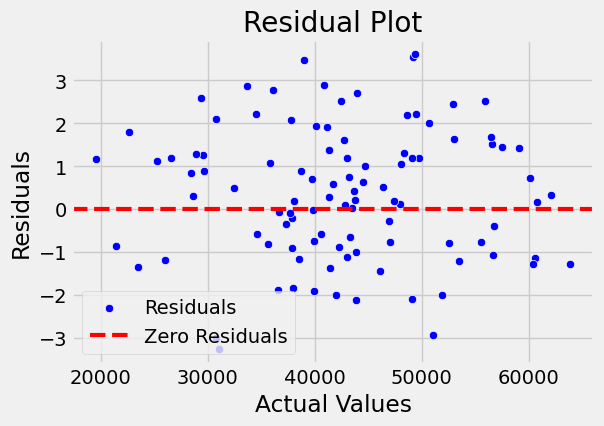

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=(y_test - ypred_test_lr_sfs), color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=3, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

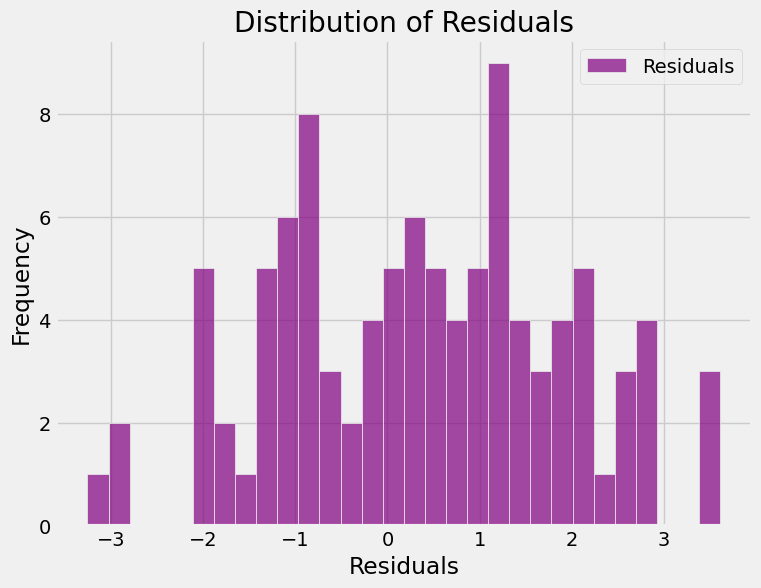

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - ypred_test_lr_sfs, bins=30, color='purple', alpha=0.7, label='Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

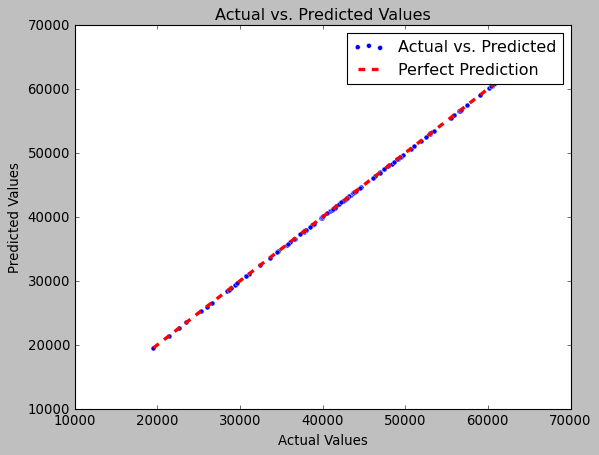

In [35]:
plt.style.use('classic')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test,
            y=ypred_test_lr_sfs, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3, 
         label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# ANALYSING THE PREDICTION

In [36]:
# getting the actual values and predicted values of train 
a=pd.DataFrame({'ACTUAL':y_train, 'PREDICTED': ypred_train_lr_sfs})

In [37]:
# getting the actual values and predicted values of test
b=pd.DataFrame({'ACTUAL':y_test, 'PREDICTED': ypred_test_lr_sfs})

In [38]:
#concating actual and predicted of test and train
c=pd.concat([a,b])
c

,ACTUAL,PREDICTED
438,43898.27330,43897.829921
273,53502.97742,53500.790883
58,38147.81018,38146.911799
380,47715.96049,47716.064958
78,38502.42392,38502.579960
...,...,...
485,47443.74443,47443.563585
92,25971.95673,25973.149377
352,60390.06616,60391.349927
102,33640.73697,33637.857595


In [39]:
# merging these values to the oroginal data frame. 
final_df=df2.join(c)

In [40]:
final_df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent,ACTUAL,PREDICTED
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Europe,35321.45877,35320.339878
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,NorthAmerica,45115.52566,45114.886885
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Africa,42925.70921,42926.046688
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Oceania,67422.36313,67424.293453
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,SouthAmerica,55915.46248,55912.950519
...,...,...,...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,Asia,48901.44342,48901.196016
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,Africa,31491.41457,31489.690812
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,Asia,64147.28888,64146.886224
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,Africa,45442.15353,45442.306488


In [41]:
# check the minimum prediction 
final_df['PREDICTED'].min()

9001.488396325207

In [42]:
# check the maximum prediction 
final_df['PREDICTED'].max()

70879.2925153666

In [44]:
# chcking the description of the prediction 
final_df[['ACTUAL','PREDICTED']].describe()

,ACTUAL,PREDICTED
count,499.000000,499.000000
mean,44138.075369,44138.000648
std,10663.822719,10663.837827
min,9000.000000,9001.488396
25%,37545.475490,37545.444006
50%,43994.359720,43991.659932
75%,51175.998140,51177.531899
max,70878.296640,70879.292515


In [57]:
final_df.groupby('age')[['PREDICTED']].mean().sort_values(by='PREDICTED',ascending=False)

,PREDICTED
age,
48.256556,70879.292515
61.704299,70597.353623
59.619615,69668.939501
55.275143,68925.730559
61.224132,68678.647165
...,...
33.483130,17584.340741
32.094081,12895.010730
35.375156,12538.269995


In [56]:
final_df.groupby('age')[['PREDICTED']].mean().sort_values(by='PREDICTED',ascending=True)

,PREDICTED
age,
25.179893,9001.488396
22.000387,10092.065522
35.375156,12538.269995
32.094081,12895.010730
33.483130,17584.340741
...,...
61.224132,68678.647165
55.275143,68925.730559
59.619615,69668.939501


In [66]:
final_df.groupby(['continent'])[['PREDICTED']].sum().sort_values(by='PREDICTED',ascending=False)

,PREDICTED
continent,
Africa,5.355735e+06
Asia,5.211894e+06
NorthAmerica,3.770807e+06
Europe,3.509413e+06
Oceania,2.384183e+06
SouthAmerica,1.455998e+06
Antartica,3.368324e+05


In [67]:
final_df.groupby(['continent'])[['PREDICTED']].mean().sort_values(by='PREDICTED',ascending=False)

,PREDICTED
continent,
Europe,44992.474110
Asia,44930.124955
Africa,44262.269320
Oceania,44151.539505
NorthAmerica,43846.591561
Antartica,42104.044094
SouthAmerica,40444.386107


In [73]:
# get the age category
def age_cat(age):
    if age<=18:
        return "Teenager"
    elif (age>=29) & (age<=30):
        return "Youth"
    elif (age>=31) & (age<=45):
        return "Middle Age"
    elif (age>=45) & (age<=60):
        return " old adult"
    elif (age>=60):
        return "senior"
    
final_df["Age Cat"] = final_df["age"].apply(lambda x: age_cat(x))

In [74]:
final_df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent,ACTUAL,PREDICTED,Age Cat
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Europe,35321.45877,35320.339878,Middle Age
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,NorthAmerica,45115.52566,45114.886885,Middle Age
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Africa,42925.70921,42926.046688,Middle Age
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Oceania,67422.36313,67424.293453,old adult
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,SouthAmerica,55915.46248,55912.950519,old adult
...,...,...,...,...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,Asia,48901.44342,48901.196016,Middle Age
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,Africa,31491.41457,31489.690812,Middle Age
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,Asia,64147.28888,64146.886224,old adult
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,Africa,45442.15353,45442.306488,old adult


In [82]:
final_df.groupby(['Age Cat'])[['PREDICTED']].mean().sort_values(by='PREDICTED',ascending=False)

,PREDICTED
Age Cat,
senior,56097.493783
old adult,48401.779468
Middle Age,38613.178680
Youth,29823.324762


In [83]:
final_df.groupby(['Age Cat','gender'])[['PREDICTED']].mean().sort_values(by='PREDICTED',ascending=False)

PREDICTED
Age Cat    gender              
senior     1       59429.875255
           0       53534.123419
 old adult 0       48582.620641
           1       48209.079857
Middle Age 0       39712.308180
           1       37630.770897
Youth      1       29823.324762

### From the prediction analysis the following points can be summarized:
	1. minimum car purchase amount is 9001. 
	2. highest car purchase amount is 70879.
	3. Person with Age 48 purchased the car with high amount. 
	4. 25 year old guy purchased the lowest priced car. 
	5. Africans brought car with high prices. (Sum of money)
	6. Europe has the highest average in car purachse price. 
	7. Averge car purchase price from Senior people is high. 


### Inferences from these analysing points are:
	* Due to Finanical stability in life, senior citizens are ready to spend more on cars. May be highly valued cars. From business point, They are good customers.
	* The Youth seems to spend less on cars, may be due to less financial stability, more carloans, EMI and other measures could increase their spending.
	* Compared to other continents Europe and Asia seems to be a better market for car sales.
	* Even though the total sales is high in Africa, the average sales is high in EUROPE which can be interpreted as, Africa may have more rich people buying costly cars, while Europe has more buyers in the median car price. 

# Deploy the model

In [204]:
import pickle
import streamlit

In [192]:
model=open('rfc.pickle','wb')
pickle.dump(lr_model_sfs,model)  
model.close()

In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
st.set_option('deprecation.showPyplotGlobalUse', False)

st.title('Sale Price Prediction')
st.subheader('What is the car purchase amount?')

df=pd.read_csv(r"car_purchasing.csv", encoding='latin1')

if st.sidebar.checkbox('View Data', False):
    st.write(df)
if st.sidebar.checkbox('View Distributions', False):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
    
# step 1 : load the pickled model
model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()
    

# step 2. get the front end user input 

age=st.slider('age',22,70,22) # chhange min and max to df4
salary=st.slider('annual Salary',20000,100000,20000)
worth=st.slider('net worth',200000,1000000,200000)
asia=st.number_input('continent_Asia',0,1)
europe=st.number_input('continent_Europe',0,1)

#step 3: get the model input (convert user input to model imput)
input_data=[[age,salary,worth,asia,europe]]

#step 4: get the prediction and print the results 

prediction=clf.predict(input_data)[0]
st.button('Predict')
st.success(f'The predicted car purchase amount is: {prediction:.2f}')

Overwriting app.py


In [195]:
sfs_forward.k_feature_names_

('age', 'annual Salary', 'net worth', 'continent_Asia', 'continent_Europe')

In [201]:
df['net worth'].max()

1000000.0

### thankyou